<a href="https://colab.research.google.com/github/Mehdibenismail/M/blob/master/Genesis_Deep_Neural_Network_(AOT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import io

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving G2.csv to G2.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['G2.csv']))

print(df.shape)
df.head()

(103, 6)


,Temperature,Humidity,EC,pH,WaterTemp,Label
0,22.0,18.0,6.75,2.0,21.31,1
1,22.0,18.0,8.99,2.0,21.31,1
2,22.0,18.0,813.33,2.0,21.31,1
3,21.0,18.0,902.80,2.0,21.31,1
4,21.0,20.0,874.35,2.0,21.31,1


In [ ]:
df.isnull().sum()

Temperature    0
Humidity       0
EC             0
pH             0
WaterTemp      0
Label          0
dtype: int64

In [ ]:
print(df.shape)

(103, 6)


In [ ]:
dataset = df.values

X = dataset[:,0:5]
Y = dataset[:,5]
Y = Y.reshape(-1,1)


print(X.shape)
print(Y.shape)
print(type(X))
print (X)

(103, 5)
(103, 1)
<class 'numpy.ndarray'>
[[  22.     18.      6.75    2.     21.31]
 [  22.     18.      8.99    2.     21.31]
 [  22.     18.    813.33    2.     21.31]
 [  21.     18.    902.8     2.     21.31]
 [  21.     20.    874.35    2.     21.31]
 [  21.     18.    874.35    2.     21.31]
 [  21.     18.    881.39    2.     21.31]
 [  22.     18.    899.2     2.     21.31]
 [  22.     18.    892.04    2.     21.31]
 [  22.     19.    892.04    2.     21.31]
 [  23.     19.   1045.95    2.     21.31]
 [  23.     35.   1013.32    2.     21.31]
 [  23.     19.   1006.46    2.     22.75]
 [  24.     21.    982.17    2.     24.12]
 [  24.     32.    966.19    2.     24.94]
 [  24.     45.    955.43    2.     25.5 ]
 [  24.     30.    932.34    2.     25.94]
 [  24.     31.    930.33    2.     26.25]
 [  25.     31.    919.62    2.     26.44]
 [  25.     47.    916.28    2.     26.62]
 [  27.     63.    906.85    2.     26.75]
 [  27.     61.    908.26    2.     26.87]
 [  28.     

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(82, 5) (10, 5) (11, 5) (82, 1) (10, 1) (11, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


model = Sequential()

model.add(Dense(60, activation='relu',  kernel_initializer='normal', input_shape=(5,), kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(120, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(240, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(120, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam



model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, Y_train,
                batch_size=30, epochs=300,
                validation_data=(X_val, Y_val))

Epoch 1/300
3/3 [==============================] - 1s 118ms/step - loss: 5.7009 - mae: 0.8260 - val_loss: 5.8793 - val_mae: 1.0305
Epoch 2/300
3/3 [==============================] - 0s 18ms/step - loss: 5.4024 - mae: 0.8125 - val_loss: 5.5822 - val_mae: 1.0095
Epoch 3/300
3/3 [==============================] - 0s 20ms/step - loss: 5.1246 - mae: 0.8021 - val_loss: 5.2848 - val_mae: 0.9827
Epoch 4/300
3/3 [==============================] - 0s 19ms/step - loss: 4.8502 - mae: 0.7833 - val_loss: 4.9895 - val_mae: 0.9437
Epoch 5/300
3/3 [==============================] - 0s 20ms/step - loss: 4.5855 - mae: 0.7556 - val_loss: 4.6946 - val_mae: 0.8968
Epoch 6/300
3/3 [==============================] - 0s 22ms/step - loss: 4.3013 - mae: 0.7129 - val_loss: 4.3755 - val_mae: 0.8392
Epoch 7/300
3/3 [==============================] - 0s 33ms/step - loss: 4.0492 - mae: 0.6852 - val_loss: 4.0396 - val_mae: 0.7630
Epoch 8/300
3/3 [==============================] - 0s 20ms/step - loss: 3.7761 - mae: 0.6

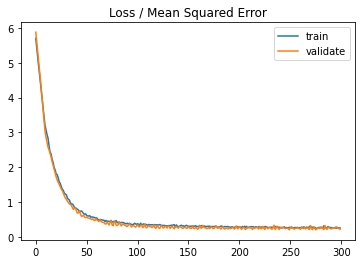

In [ ]:
from matplotlib import pyplot

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

 loss plot showing the decrease of mse over the number of training epochs for the training and validation sets
 :

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.1556 - mae: 0.2018


[0.15560774505138397, 0.20176345109939575]

In [ ]:
Y_result_scaled= model.predict(X_test)
predictions = model.predict(X_test)





Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))




1/1 [==============================] - 0s 21ms/step
[[5.799124 ]
 [5.403627 ]
 [1.2610326]
 [0.6943803]
 [5.241634 ]
 [2.4181328]
 [4.358451 ]
 [0.9699013]
 [1.0798566]
 [7.7059655]
 [0.7200048]]
[[5.]
 [5.]
 [0.]
 [1.]
 [5.]
 [3.]
 [5.]
 [0.]
 [1.]
 [8.]
 [1.]]


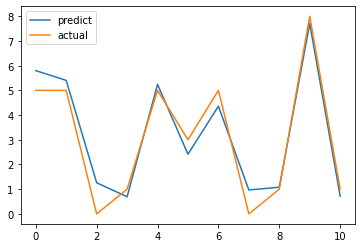

In [ ]:
import numpy as np

axis_x = [i for i in range(11)]


pyplot.plot(axis_x, Y_result[:(11)], label='predict')
pyplot.plot(axis_x, Y_test_unscaled[:11], label='actual')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9413690445603732
mse = 0.40050917901969674
r2 = 0.9378697299213035


In [ ]:
model_json = model.to_json()
with open('model.json', "w") as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

Comparaison between our Linear Regression Prediction and Neural Network, we can see that: 


- For Linear Regression: 

mse = 38256.791253197094

R2 = 0.6236612710196506

- For Neural Network:

explained variance = 0.881462204367418

mse = 12496.282985714372

r2 = 0.8753130783633626
